# Assurance of Learning (Number 2)

## Import Library

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error

## Data

In [6]:
months = np.arange(1, 145)
data = [
    1863, 1614, 2570, 1685, 2101, 1811, 2457, 2171, 2134, 2502, 2358, 2399, 2048, 2523, 2086, 2391,
    2150, 2340, 3129, 2277, 2964, 2997, 2747, 2862, 3405, 2677, 2749, 2755, 2963, 3161, 3623, 2768,
    3141, 3439, 3601, 3531, 3477, 3376, 4027, 3175, 3274, 3334, 3964, 3649, 3502, 3688, 3657, 4422,
    4197, 4441, 4736, 4521, 4485, 4644, 5036, 4876, 4789, 4544, 4975, 5211, 4880, 4933, 5079, 5339,
    5232, 5520, 5714, 5260, 6110, 5334, 5988, 6235, 6365, 6266, 6345, 6118, 6497, 6278, 6638, 6590,
    6271, 7246, 6584, 6594, 7092, 7326, 7409, 7976, 7959, 8012, 8195, 8008, 8313, 7791, 8368, 8933,
    8756, 8613, 8705, 9098, 8769, 9544, 9050, 9186, 10012, 9685, 9966, 10048, 10244, 10740, 10318,
    10393, 10986, 10635, 10731, 11749, 11849, 12123, 12274, 11666, 11960, 12629, 12915, 13051,
    13387, 13309, 13732, 13162, 13644, 13808, 14101, 13992, 15191, 15018, 14917, 15046, 15556,
    15893, 16388, 16782, 16716, 17033, 16896, 17689
]

## Taylor Series

Polynomial Function and its Derivatives:
F(x) = 0.0000002515x^5 + -0.0000625150x^4 + 0.0073252801x^3 + -0.0014574290x^2 + 35.5201677705x^1 + 1868.5382788214
F^(1)(x) = 0.0000012575x^4 + -0.0002500599x^3 + 0.0219758402x^2 + -0.0029148581x^1 + 35.5201677705
F^(2)(x) = 0.0000050299x^3 + -0.0007501797x^2 + 0.0439516805x^1 + -0.0029148581
F^(3)(x) = 0.0000150897x^2 + -0.0015003593x^1 + 0.0439516805
F^(4)(x) = 0.0000301794x^1 + -0.0015003593
F^(5)(x) = 0.0000301794

Evaluating Taylor Series around a = 72 for x = 1
Term 0: 5959.1850514140 * ((1 - 72) ** 0) / 1 = 5959.185051413965
Term 1: 89.6919106984 * ((1 - 72) ** 1) / 1 = -6368.125659583133
Term 2: 1.1500753222 * ((1 - 72) ** 2) / 2 = 2898.7648497043324
Term 3: 0.0141508328 * ((1 - 72) ** 3) / 6 = -844.1231171484436
Term 4: 0.0006725580 * ((1 - 72) ** 4) / 24 = 712.1179038131307
Term 5: 0.0000301794 * ((1 - 72) ** 5) / 120 = -453.7547760203996
Taylor Series: 5959.1850514140 * ((1 - 72) ** 0) / 1 + 89.6919106984 * ((1 - 72) ** 1) / 1 + 1.15

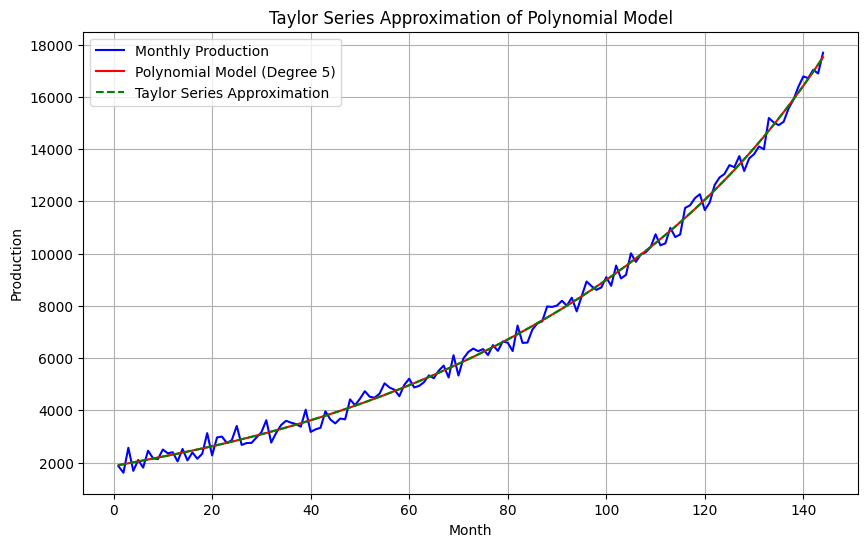

Mean Squared Error (Taylor Series Approximation): 79412.21257840595



In [7]:
# Polynomial Model Equation Degree 5

poly_coeffs = np.polyfit(months, data, 5)
poly_model = np.poly1d(poly_coeffs)

# Find the derivative of Polynomial

poly_derivatives = [np.polyder(poly_model, m) for m in range(6)]

# Function to Print the polynomial equation and its derivative

def print_polynomial_function(poly):
    coeffs = poly.coefficients
    degree = len(coeffs) - 1
    func_str = " + ".join([f"{coeff:.10f}x^{degree - i}" if degree - i != 0 else f"{coeff:.10f}" for i, coeff in enumerate(coeffs)])
    return func_str

# Print the polynomial equation and its derivative

print("Polynomial Function and its Derivatives:")
for i, derivative in enumerate(poly_derivatives):
    if i == 0:
        print(f"F(x) = {print_polynomial_function(derivative)}")
    else:
        print(f"F^({i})(x) = {print_polynomial_function(derivative)}")

# Function to make a Taylor Series

def taylor_series_approximation(x, a, derivatives):
    approximation = 0
    terms = []
    print(f'\nEvaluating Taylor Series around a = {a} for x = {x}')
    for n, derivative in enumerate(derivatives):
        term_value = derivative(a) * ((x - a) ** n) / math.factorial(n)
        approximation += term_value
        term_str = f"{derivative(a):.10f} * (({x} - {a}) ** {n}) / {math.factorial(n)}"
        terms.append(term_str)
        print(f'Term {n}: {term_str} = {term_value}')
    return approximation, terms

a = len(months) // 2  # Point of a (Middle Value = 144/2 = 72)

# Taylor Series Value Printing

taylor_approximations = []
for x in months:
    approx, terms = taylor_series_approximation(x, a, poly_derivatives)
    taylor_approximations.append(approx)
    print(f'Taylor Series: {" + ".join(terms)}\nBag Production at x={x}: {approx}\n')

# Plotting the Original Data, Polynomial Model, and Taylor Series Model

plt.figure(figsize=(10, 6))
plt.plot(months, data, label='Monthly Production', color='blue')
plt.plot(months, poly_model(months), label='Polynomial Model (Degree 5)', color='red')
plt.plot(months, taylor_approximations, label='Taylor Series Approximation', color='green', linestyle='dashed')
plt.xlabel('Month')
plt.ylabel('Production')
plt.title('Taylor Series Approximation of Polynomial Model')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the Taylor Series Approximation

mse_taylor = mean_squared_error(data, taylor_approximations)
print(f'Mean Squared Error (Taylor Series Approximation): {mse_taylor}\n')

# Code to evaluate another Y value based on X-value given

# x_manual = 165  # Change any x-value
# approx_manual, terms_manual = taylor_series_approximation(x_manual, a, poly_derivatives)
# print(f'Taylor Series at x={x_manual}: {approx_manual}\nTerms: {" + ".join(terms_manual)}\n')

## Maclaurin Series (a = 0)


Evaluating Maclaurin Series around a = 0 for x = 1
Term 0: 1868.5382788214 * ((1 - 0) ** 0) / 1 = 1868.5382788213767
Term 1: 35.5201677705 * ((1 - 0) ** 1) / 1 = 35.52016777050106
Term 2: -0.0029148581 * ((1 - 0) ** 2) / 2 = -0.001457429028058732
Term 3: 0.0439516805 * ((1 - 0) ** 3) / 6 = 0.007325280080354885
Term 4: -0.0015003593 * ((1 - 0) ** 4) / 24 = -6.251497246405873e-05
Term 5: 0.0000301794 * ((1 - 0) ** 5) / 120 = 2.5149506395564653e-07
Maclaurin Series: 1868.5382788214 * ((1 - 0) ** 0) / 1 + 35.5201677705 * ((1 - 0) ** 1) / 1 + -0.0029148581 * ((1 - 0) ** 2) / 2 + 0.0439516805 * ((1 - 0) ** 3) / 6 + -0.0015003593 * ((1 - 0) ** 4) / 24 + 0.0000301794 * ((1 - 0) ** 5) / 120
Bag Production at x=1: 1904.0642521794525


Evaluating Maclaurin Series around a = 0 for x = 2
Term 0: 1868.5382788214 * ((2 - 0) ** 0) / 1 = 1868.5382788213767
Term 1: 35.5201677705 * ((2 - 0) ** 1) / 1 = 71.04033554100212
Term 2: -0.0029148581 * ((2 - 0) ** 2) / 2 = -0.005829716112234928
Term 3: 0.0439516

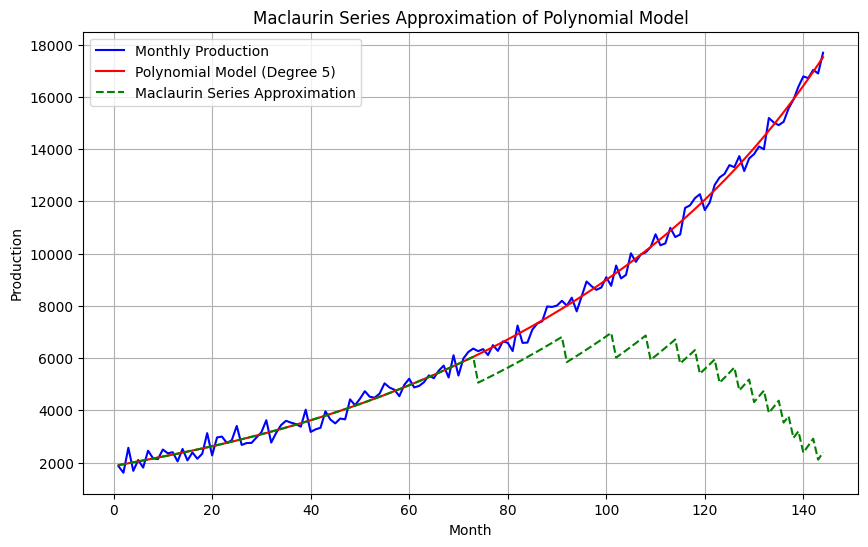

Mean Squared Error (maclaurin Series Approximation): 22935271.85594084



In [8]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error

# Data

months = np.arange(1, 145)
data = [
    1863, 1614, 2570, 1685, 2101, 1811, 2457, 2171, 2134, 2502, 2358, 2399, 2048, 2523, 2086, 2391,
    2150, 2340, 3129, 2277, 2964, 2997, 2747, 2862, 3405, 2677, 2749, 2755, 2963, 3161, 3623, 2768,
    3141, 3439, 3601, 3531, 3477, 3376, 4027, 3175, 3274, 3334, 3964, 3649, 3502, 3688, 3657, 4422,
    4197, 4441, 4736, 4521, 4485, 4644, 5036, 4876, 4789, 4544, 4975, 5211, 4880, 4933, 5079, 5339,
    5232, 5520, 5714, 5260, 6110, 5334, 5988, 6235, 6365, 6266, 6345, 6118, 6497, 6278, 6638, 6590,
    6271, 7246, 6584, 6594, 7092, 7326, 7409, 7976, 7959, 8012, 8195, 8008, 8313, 7791, 8368, 8933,
    8756, 8613, 8705, 9098, 8769, 9544, 9050, 9186, 10012, 9685, 9966, 10048, 10244, 10740, 10318,
    10393, 10986, 10635, 10731, 11749, 11849, 12123, 12274, 11666, 11960, 12629, 12915, 13051,
    13387, 13309, 13732, 13162, 13644, 13808, 14101, 13992, 15191, 15018, 14917, 15046, 15556,
    15893, 16388, 16782, 16716, 17033, 16896, 17689
]

# Polynomial Model Equation Degree 5

poly_coeffs = np.polyfit(months, data, 5)
poly_model = np.poly1d(poly_coeffs)

# Find the derivative of Polynomial

poly_derivatives = [np.polyder(poly_model, m) for m in range(6)]

# Function to make a maclaurin Series

def maclaurin_series_approximation(x, a, derivatives):
    approximation = 0
    terms = []
    print(f'\nEvaluating Maclaurin Series around a = {a} for x = {x}')
    for n, derivative in enumerate(derivatives):
        term_value = derivative(a) * ((x - a) ** n) / math.factorial(n)
        approximation += term_value
        term_str = f"{derivative(a):.10f} * (({x} - {a}) ** {n}) / {math.factorial(n)}"
        terms.append(term_str)
        print(f'Term {n}: {term_str} = {term_value}')
    return approximation, terms

a = 0 # Maclaurin Series (a = 0)

# maclaurin Series Value Printing

maclaurin_approximations = []
for x in months:
    approx, terms = maclaurin_series_approximation(x, a, poly_derivatives)
    maclaurin_approximations.append(approx)
    print(f'Maclaurin Series: {" + ".join(terms)}\nBag Production at x={x}: {approx}\n')

# Plotting the Original Data, Polynomial Model, and maclaurin Series Model

plt.figure(figsize=(10, 6))
plt.plot(months, data, label='Monthly Production', color='blue')
plt.plot(months, poly_model(months), label='Polynomial Model (Degree 5)', color='red')
plt.plot(months, maclaurin_approximations, label='Maclaurin Series Approximation', color='green', linestyle='dashed')
plt.xlabel('Month')
plt.ylabel('Production')
plt.title('Maclaurin Series Approximation of Polynomial Model')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the maclaurin Series Approximation

mse_maclaurin = mean_squared_error(data, maclaurin_approximations)
print(f'Mean Squared Error (maclaurin Series Approximation): {mse_maclaurin}\n')

# Code to evaluate another Y value based on X-value given

# x_manual = months[73]  # Change any x-value
# a = 0 # Maclaurin Series (a = 0)
# approx_manual, terms_manual = maclaurin_series_approximation(x_manual, a, poly_derivatives)
# print(f'Maclaurin Series at x={x_manual}: {approx_manual}\nTerms: {" + ".join(terms_manual)}\n')

The final answer using Taylor Series or Macluarin Series is actually the same, the difference between that series is just in Macluarin Series we will use (a = 0).

### Evaluation

The graph image given in the Taylor Series Section actually already give us evaluation that the expansion of Taylor Series based on the Derivative of Polynomial Equation Model has no different with the Original Polynomial Model.

### Conclusion

We will using the Taylor Series where the a value is middle point of months which is (a = 144 / 2 = 72).

Taylor Series:
5959.1850514140 * ((x - 72) ** 0) / 1 + 89.6919106984 * ((x - 72) ** 1) / 1 + 1.1500753222 * ((x - 72) ** 2) / 2 + 0.0141508328 * ((x - 72) ** 3) / 6 + 0.0006725580 * ((x - 72) ** 4) / 24 + 0.0000301794 * ((x - 72) ** 5) / 120